In [1]:
import pandas as pd

In [4]:
fpath = './data/subway_data/subway_raw.xlsx'

raw = pd.read_excel(fpath)
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,화,경춘선,1323,가평,1520,1436,20190104
1,20190101,화,경춘선,1322,상천,275,114,20190104
2,20190101,화,경춘선,1321,청평,1509,1083,20190104
3,20190101,화,경춘선,1320,대성리,357,271,20190104
4,20190101,화,경춘선,1319,마석,1772,1963,20190104


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99342 entries, 0 to 99341
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   요일      99342 non-null  object
 2   노선명     99342 non-null  object
 3   역ID     99342 non-null  int64 
 4   역명      99342 non-null  object
 5   승차총승객수  99342 non-null  int64 
 6   하차총승객수  99342 non-null  int64 
 7   등록일자    99342 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 6.1+ MB


In [7]:
data_date = raw.pivot_table(index = ['사용일자', '요일'],
                            values = '승차총승객수',
                            aggfunc = 'sum')
data_date.head()

,,승차총승객수
사용일자,요일,
20190101,화,3419948
20190102,수,7621668
20190103,목,7873692
20190104,금,8270345
20190105,토,6062294


In [9]:
data_date.sort_values(by = '승차총승객수', ascending = False)

,,승차총승객수
사용일자,요일,
20190503,금,9229899
20190510,금,9164243
20190524,금,9068976
20190517,금,9058227
20190412,금,9012472
...,...,...
20190206,수,3741895
20190101,화,3419948
20190203,일,3412440


In [12]:
raw.tail()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
99337,20190630,일,2호선,204,을지로4가,4940,4668,20190703
99338,20190630,일,2호선,203,을지로3가,12043,11854,20190703
99339,20190630,일,2호선,202,을지로입구,31622,29723,20190703
99340,20190630,일,2호선,201,시청,10178,8214,20190703
99341,20190630,일,1호선,159,동묘앞,13859,14352,20190703


In [10]:
# 가설1 : 5월에 승객수가 많다?

# 가설2 : 금요일에 승객수가 많다?

In [15]:
# 가설1 : 5월에 승객수가 많다?

# 사용일자(연월일) 데이터에서 연월/월일 데이터 정리

yearmonth_list = [ ]
monthday_list = [ ]

for date in raw['사용일자']:
    
    yearmonth = str(date)[:6]
    yearmonth_list.append(yearmonth)
    
    monthday = str(date)[4:]
    monthday_list.append(monthday)

In [16]:
# 연월 / 월일 컬럼 추가

raw['연월'] = yearmonth_list
raw['월일'] = monthday_list

raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,연월,월일
0,20190101,화,경춘선,1323,가평,1520,1436,20190104,201901,0101
1,20190101,화,경춘선,1322,상천,275,114,20190104,201901,0101
2,20190101,화,경춘선,1321,청평,1509,1083,20190104,201901,0101
3,20190101,화,경춘선,1320,대성리,357,271,20190104,201901,0101
4,20190101,화,경춘선,1319,마석,1772,1963,20190104,201901,0101


In [20]:
# 월별 승객수 정리

# 피벗테이블 하는 3가지 방법
# raw.pivot_table(index = , values = , aggfunc = )
# pd.pivot_table(data = raw, index = , values = , aggfunc = )
# pd.pivot_table(raw, index = , values = , aggfunc = )

data_month = raw.pivot_table(index = '연월', values = '승차총승객수', aggfunc = 'sum').sort_values(by = '승차총승객수', ascending = False)
data_month

,승차총승객수
연월,
201905,236267004
201901,221848014
201906,221547039
201904,218832085
201902,190335812
201903,157782643


In [21]:
# 가설1 : 5월에 승객수가 많다?  -> True !

In [28]:
# 가설2 : 금요일에 승객수가 많다?

data_week = pd.pivot_table(data = raw, index = '요일', values = '승차총승객수', aggfunc = 'sum')
data_week = data_week.sort_values(by = '승차총승객수', ascending = False)
data_week

,승차총승객수
요일,
금,214064383
화,198116552
목,197522587
월,187921393
수,176959733
토,157401217
일,114626732


In [29]:
# 가설2 : 금요일에 승객수가 많다? -> True !

In [33]:
# 가설3 : 월별로 편차가 존재하나?

# 우선 한달치 데이터를 먼저 살펴보자

yearmonth = '201901'
cond = raw['연월'] == yearmonth
df_selected = raw[cond]
df_selected.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,연월,월일
0,20190101,화,경춘선,1323,가평,1520,1436,20190104,201901,0101
1,20190101,화,경춘선,1322,상천,275,114,20190104,201901,0101
2,20190101,화,경춘선,1321,청평,1509,1083,20190104,201901,0101
3,20190101,화,경춘선,1320,대성리,357,271,20190104,201901,0101
4,20190101,화,경춘선,1319,마석,1772,1963,20190104,201901,0101


In [36]:
df_pivot = df_selected.pivot_table(index = ['월일', '요일'], values = '승차총승객수', aggfunc ='sum')

df_pivot = df_pivot.reset_index() # 멀티인덱스를 초기화해서 컬럼으로 변경
df_pivot.head()

,월일,요일,승차총승객수
0,0101,화,3419948
1,0102,수,7621668
2,0103,목,7873692
3,0104,금,8270345
4,0105,토,6062294


In [37]:
  
# seaborn, matplotlib 의 이미지에서 한글 표현하기
# 외우지말고 그냥 복붙해서 써도 됨

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import seaborn as sns

# 이미지에 한글 표시 설정
if platform.system() == 'Windows': # 윈도우인 경우 맑은고딕
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else :  # Mac인 경우 애플고딕
    rc('font', family='AppleGothic')

# 그래프에서 마이너스 기호가 표시되도록 하는 설정
matplotlib.rcParams['axes.unicode_minus'] = False

<AxesSubplot:xlabel='월일', ylabel='승차총승객수'>

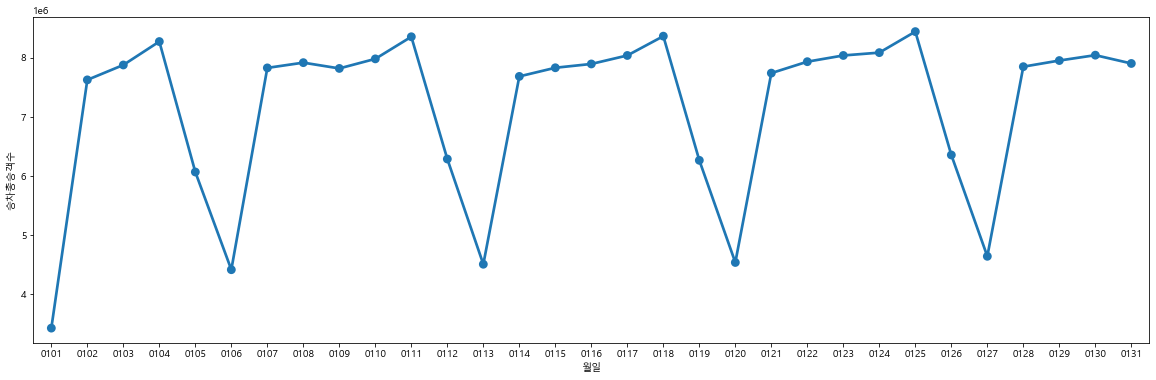

In [40]:
# 일자별 승객수를 그래프로 나타내기

fig, ax = plt.subplots(figsize = (20, 6))

sns.pointplot(data = df_pivot, x = '월일', y = '승차총승객수')

In [41]:
raw['연월'].unique()

array(['201901', '201902', '201903', '201904', '201905', '201906'],
      dtype=object)

201901
201902
201903
201904
201905
201906


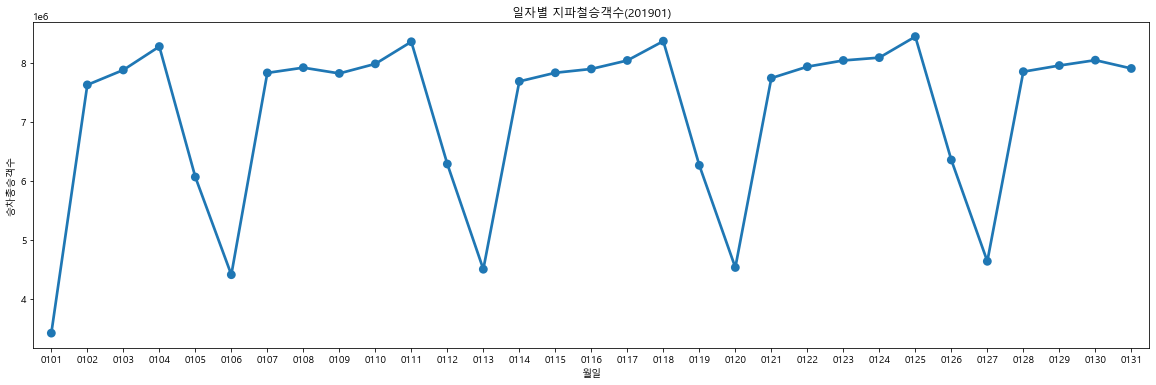

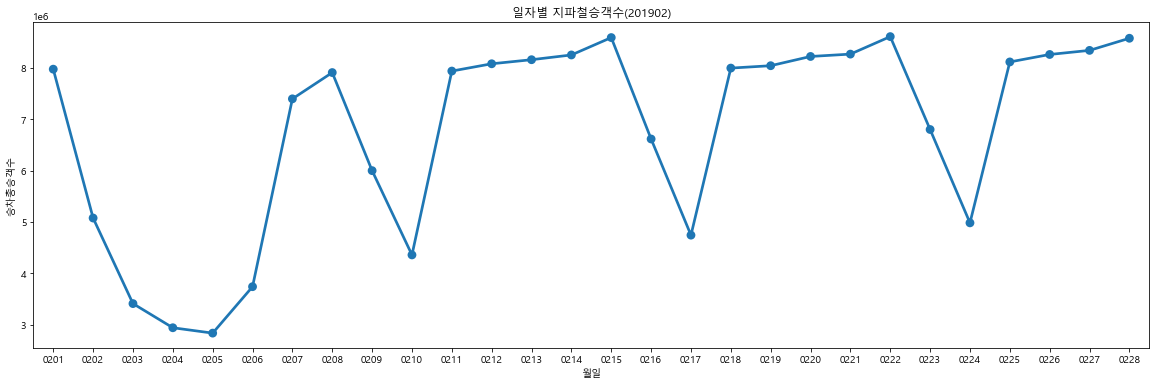

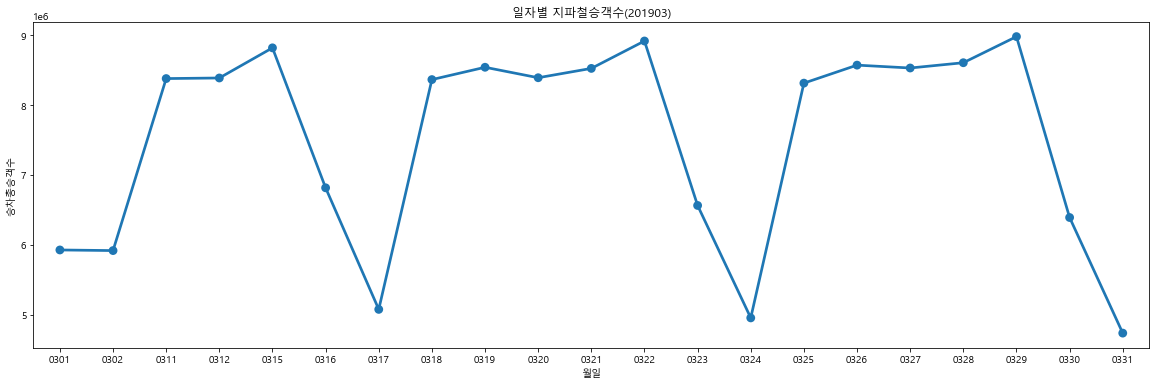

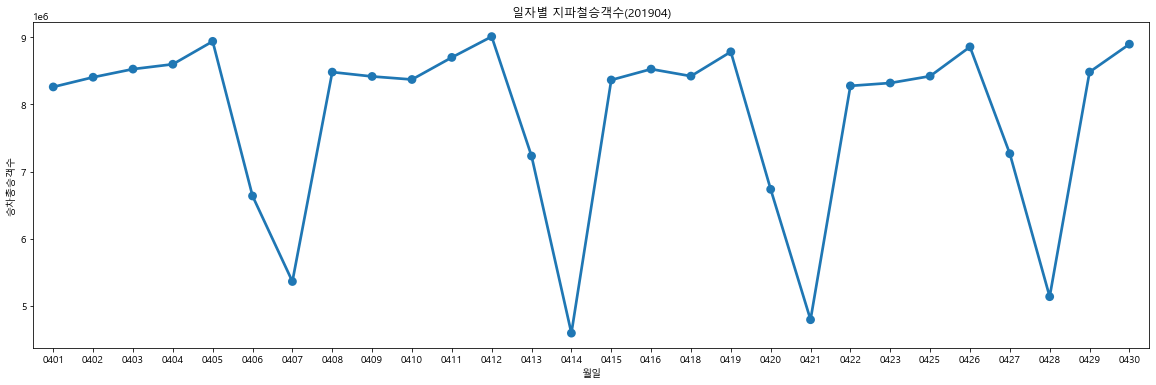

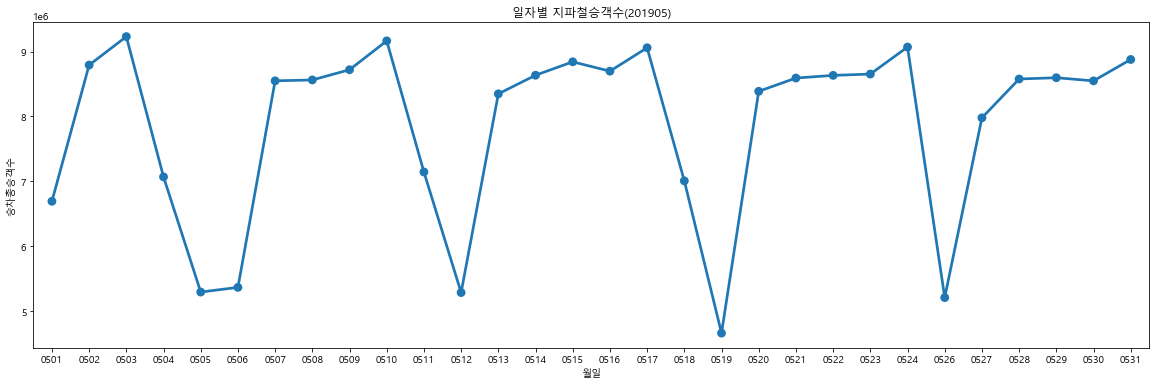

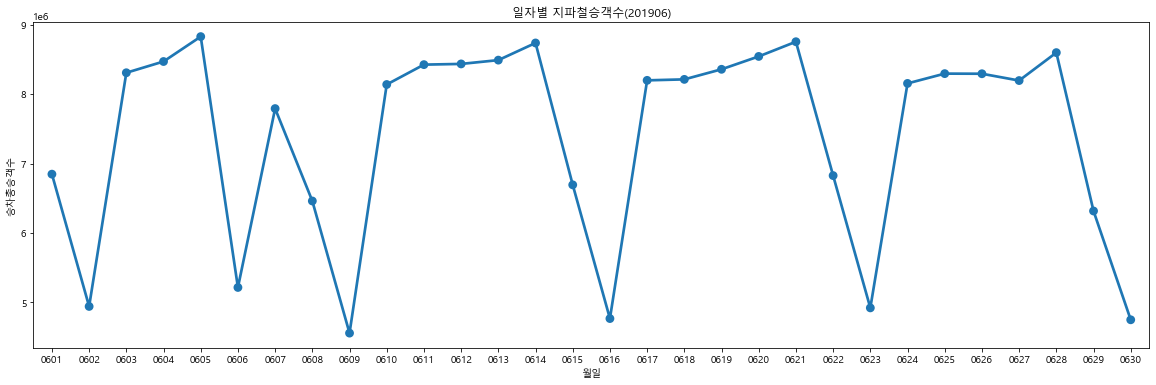

In [44]:
# 반복문으로 모든 월에 대한 그래프 그리기

for yearmonth in raw['연월'].unique():
    print(yearmonth)
    
    cond = raw['연월'] == yearmonth
    df_selected = raw[cond]
    
    df_pivot = df_selected.pivot_table(index = ['월일', '요일'], values = '승차총승객수', aggfunc ='sum')
    df_pivot = df_pivot.reset_index() 
    
    fig, ax = plt.subplots(figsize = (20, 6))
    
    # 그래프에 제목 넣기
    ax.set_title(f"일자별 지파철승객수({yearmonth})")
    
    sns.pointplot(data = df_pivot, x = '월일', y = '승차총승객수')
